---
# Taller Final: Modelo de Clasificación para la Producción de Caña


### **1. Contexto del Problema**

La optimización del rendimiento agrícola es un pilar fundamental en la agroindustria. Para el **Ingenio Providencia**, entender los factores que determinan el éxito de una cosecha de caña de azúcar es clave para la toma de decisiones estratégicas. Este proyecto utiliza un conjunto de datos históricos (`BD_IPSA_1940.xlsx`) para explorar y modelar las variables que influyen en dos indicadores de rendimiento principales:

* **TCH (Toneladas de Caña por Hectárea):** Una métrica directa de la **cantidad** o rendimiento del cultivo.
* **% Sacarosa:** Un indicador crucial de la **calidad** del producto final.

El análisis busca pasar de una simple observación de estos indicadores a una capacidad predictiva que permita clasificar el desempeño de los lotes de cultivo.

### **2. Objetivo del Proyecto**

El objetivo central de este notebook es desarrollar un **modelo de clasificación predictivo** que pueda determinar el nivel de desempeño de un lote de caña de azúcar. Para lograrlo, el proyecto se divide en dos metas específicas:

1.  **Categorización de KPIs:** Transformar las variables continuas de rendimiento (`TCH` y `sacarosa`) en etiquetas categóricas discretas: **Bajo, Medio y Alto**. Este paso es fundamental para convertir el problema de regresión en un problema de clasificación más interpretable para fines de negocio.
2.  **Desarrollo del Modelo de Clasificación:** Entrenar y evaluar un modelo de **Regresión Logística** para predecir estas categorías de desempeño a partir de otras variables agronómicas y ambientales disponibles en el dataset. Adicionalmente, se utilizarán técnicas de regularización para identificar las variables predictoras más influyentes.

### **3. Metodología y Flujo de Trabajo**

El proyecto sigue una metodología estructurada de aprendizaje automático, abarcando desde la preparación de los datos hasta la evaluación del modelo final. El flujo de trabajo es el siguiente:

1.  **Configuración y Carga de Datos:** Importación de las librerías necesarias y carga del conjunto de datos.
2.  **Limpieza y Preprocesamiento:** Se realiza una revisión inicial de la integridad de los datos. En esta etapa se confirmó que el dataset no contenía valores nulos y se ajustaron los tipos de datos de las columnas categóricas (ej. `FAZ`, `mes`) para un tratamiento adecuado.
3.  **Análisis Exploratorio de Datos (EDA):**
    * **Análisis Univariado:** Estudio de la distribución de las variables clave (`TCH`, `sacarosa`) mediante histogramas y boxplots para entender su tendencia central, dispersión y detectar valores atípicos.
    * **Análisis Bivariado:** Investigación de las relaciones entre pares de variables utilizando gráficos de dispersión y una matriz de correlación para identificar posibles predictores lineales.
4.  **Ingeniería de Características (Feature Engineering):** Creación de las variables objetivo `Nivel_TCH` y `Nivel_Sacarosa`. Se utilizaron **terciles (cuantiles 33.3% y 66.6%)** como umbrales para asegurar que las clases resultantes estuvieran balanceadas, una práctica recomendada para modelos de clasificación.
5.  **Modelado (Regresión Logística):** Preparación de los datos para el modelo, división en conjuntos de entrenamiento y prueba, y ajuste del algoritmo de Regresión Logística.
6.  **Evaluación del Modelo:** Se empleará **validación cruzada** para obtener una estimación robusta del rendimiento del modelo. Se calcularán y analizarán métricas estándar de clasificación: `accuracy`, `precision`, `recall`, `F1-score` y `kappa`.
7.  **Análisis de Resultados y Conclusiones:** Interpretación de las métricas de evaluación y de los coeficientes del modelo para extraer conclusiones sobre su capacidad predictiva y los factores más determinantes en la producción de caña.

##Carga y limpieza de datos

In [1]:
import pandas as pd

#Importar el set de datos de base
df_original = pd.read_excel('BD_IPSA_1940.xlsx')

#Hacer una copia para las diferentes transformaciones
df_trabajo = df_original.copy()

In [3]:
#Resume inicial de las columnas
df_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2187 non-null   int64  
 1   NOME            2187 non-null   object 
 2   FAZ             2187 non-null   int64  
 3   TAL             2187 non-null   object 
 4   tipocorte       2187 non-null   object 
 5   variedad        2187 non-null   object 
 6   madurada        2187 non-null   object 
 7   producto        2187 non-null   object 
 8   dosismad        2187 non-null   float64
 9   semsmad         2187 non-null   float64
 10  edad            2187 non-null   float64
 11  cortes          2187 non-null   int64  
 12  me              2187 non-null   float64
 13  vejez           2187 non-null   float64
 14  sacarosa        2187 non-null   float64
 15  mes             2187 non-null   int64  
 16  periodo         2187 non-null   int64  
 17  TCH             2187 non-null   i

In [5]:
df_trabajo.head()

,Unnamed: 0,NOME,FAZ,TAL,tipocorte,variedad,madurada,producto,dosismad,semsmad,...,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
0,11,AMAIME SILCA,81291,40,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,8.3,...,4,12.7,2.4,14.0,12,202012,112,137,3,6.2
1,12,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.3,...,2,7.8,2.3,13.0,3,201903,157,0,3,3.5
2,13,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,7.9,...,3,8.8,1.8,13.3,3,202003,167,68,3,4.3
3,15,AMAIME SILCA,81291,43,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.6,...,1,6.1,2.5,13.4,3,201903,156,0,3,3.5
4,16,AMAIME SILCA,81291,43,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,8.1,...,2,7.9,2.1,14.0,3,202003,151,68,3,4.3


In [6]:
df_trabajo.tail()

,Unnamed: 0,NOME,FAZ,TAL,tipocorte,variedad,madurada,producto,dosismad,semsmad,...,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
2182,4216,ZABALETAS CORPORACION,80123,544B,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.3,5.6,...,3,8.5,1.8,13.5,3,201903,63,99,1,4.3
2183,4217,ZABALETAS CORPORACION,80123,545A,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.2,9.1,...,1,9.7,3.6,13.0,12,201912,126,448,1,3.1
2184,4218,ZABALETAS EMPRESA,82503,6,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.2,7.1,...,1,8.8,2.0,12.9,4,201904,173,122,1,2.2
2185,4219,ZABALETAS EMPRESA,82503,6,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.0,6.9,...,2,8.4,2.2,13.5,4,202004,134,73,1,3.1
2186,4222,ZABALETAS EMPRESA,82503,9,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.0,7.0,...,2,8.8,2.3,12.7,4,202004,157,127,1,3.1


In [7]:
df_trabajo.describe()

,Unnamed: 0,FAZ,dosismad,semsmad,edad,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,2126.506630,80588.332876,0.993278,9.164838,12.766118,2.794239,9.197759,4.172154,12.777732,6.758573,201887.691358,142.393233,118.051212,2.435299,4.317284
std,1228.561661,572.818299,0.309096,3.441579,1.117866,1.621195,1.574409,6.339255,0.854397,3.482444,131.982686,25.838029,144.424675,0.704058,2.591956
min,11.000000,80100.000000,0.000000,-1.600000,10.300000,1.000000,3.400000,0.200000,9.200000,1.000000,201407.000000,6.000000,0.000000,1.000000,0.200000
25%,1038.000000,80222.000000,0.800000,7.100000,12.000000,1.000000,8.200000,2.100000,12.200000,4.000000,201807.000000,126.000000,0.000000,2.000000,2.900000
50%,2219.000000,80396.000000,1.000000,8.700000,12.500000,2.000000,9.100000,2.600000,12.800000,7.000000,201908.000000,144.000000,77.000000,3.000000,3.700000
75%,3223.500000,80660.000000,1.200000,10.600000,13.300000,4.000000,10.100000,3.300000,13.300000,10.000000,202005.000000,159.000000,171.500000,3.000000,5.000000
max,4222.000000,82519.000000,9.000000,45.000000,21.100000,14.000000,15.000000,102.900000,16.000000,12.000000,202101.000000,249.000000,1468.000000,3.000000,25.500000


Este analisis inicial del dataser permite identificar una columna sin encabezado que no aporta dentro del analisis. Por otra parte se observa un
conjunto de datos que no tiene valores nulos para ninguna columna.

In [9]:
#Se confirma que ninguna columna tenga valores nulos
 (df_trabajo.isnull().sum() / len(df_trabajo)) * 100

,0
Unnamed: 0,0.0
NOME,0.0
FAZ,0.0
TAL,0.0
tipocorte,0.0
variedad,0.0
madurada,0.0
producto,0.0
dosismad,0.0
semsmad,0.0


In [10]:
##Limpieza de datos

# Eliminar la columna 'Unnamed: 0' que parece ser un índice residual
if 'Unnamed: 0' in df_trabajo.columns:
    df_trabajo = df_trabajo.drop(columns=['Unnamed: 0'])
    print("Columna 'Unnamed: 0' eliminada.")

# Columnas que son identificadores o categorías pero están como números (int64)
# Las convertimos a 'category' para que los modelos no las traten como valores numéricos.
# 'category' es más eficiente en memoria que 'object'.
cols_to_category_from_int = ['FAZ', 'mes', 'periodo', 'grupo_tenencia']
for col in cols_to_category_from_int:
    if col in df_trabajo.columns:
        df_trabajo[col] = df_trabajo[col].astype('category')

# Columnas que ya son texto ('object') pero representan categorías
cols_to_category_from_object = ['NOME', 'TAL', 'tipocorte', 'variedad', 'madurada', 'producto']
for col in cols_to_category_from_object:
    if col in df_trabajo.columns:
        df_trabajo[col] = df_trabajo[col].astype('category')

print("\nTipos de datos después del ajuste:")
df_trabajo.info()


Columna 'Unnamed: 0' eliminada.

Tipos de datos después del ajuste:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NOME            2187 non-null   category
 1   FAZ             2187 non-null   category
 2   TAL             2187 non-null   category
 3   tipocorte       2187 non-null   category
 4   variedad        2187 non-null   category
 5   madurada        2187 non-null   category
 6   producto        2187 non-null   category
 7   dosismad        2187 non-null   float64 
 8   semsmad         2187 non-null   float64 
 9   edad            2187 non-null   float64 
 10  cortes          2187 non-null   int64   
 11  me              2187 non-null   float64 
 12  vejez           2187 non-null   float64 
 13  sacarosa        2187 non-null   float64 
 14  mes             2187 non-null   category
 15  periodo         2187 non-null   catego

En los pasos anteriores se hizo la limpieza a los datos.No se identificaron datos nulos. Columnas como FAZ o mes parecían números pero en realidad son códigos, así que se convirtieron a tipo category.

Con los datos consistentes, arranqué con el Análisis Exploratorio (EDA). La idea aquí es empezar a entender las relaciones de los datos con histogramas y boxplots para ver cómo se distribuyen el TCH y la sacarosa, y luego buscar relaciones entre las variables

##Analisis univariado

In [13]:
# --- Configuración de Estilo para los Gráficos ---
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

--- Análisis Univariado de TCH y Sacarosa ---


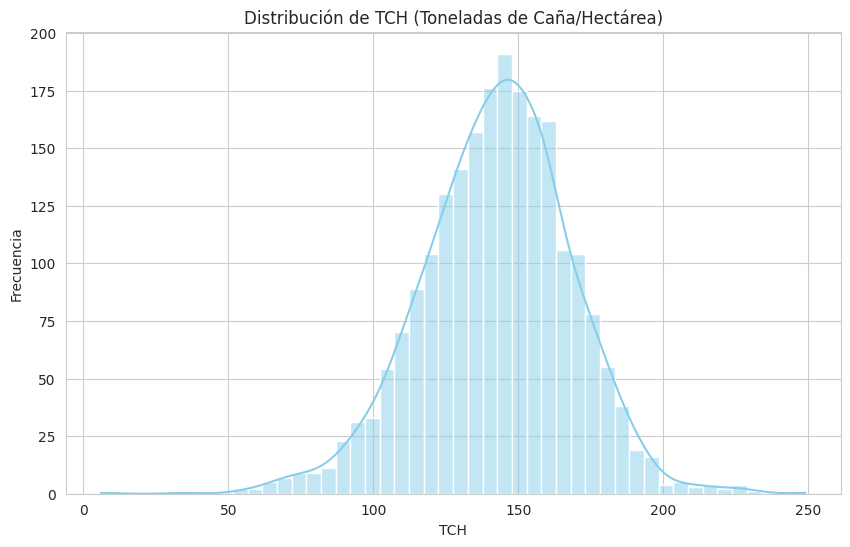

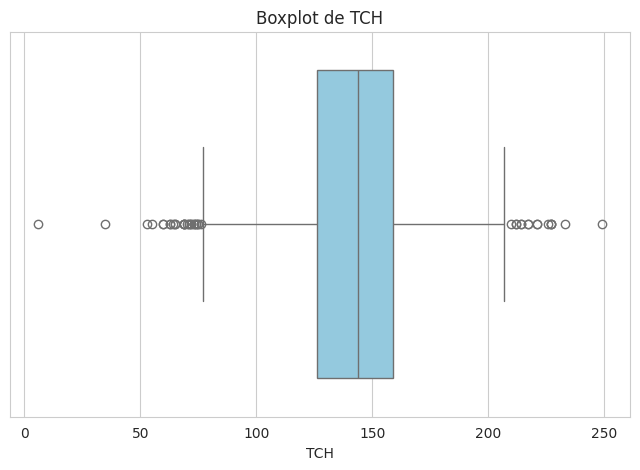

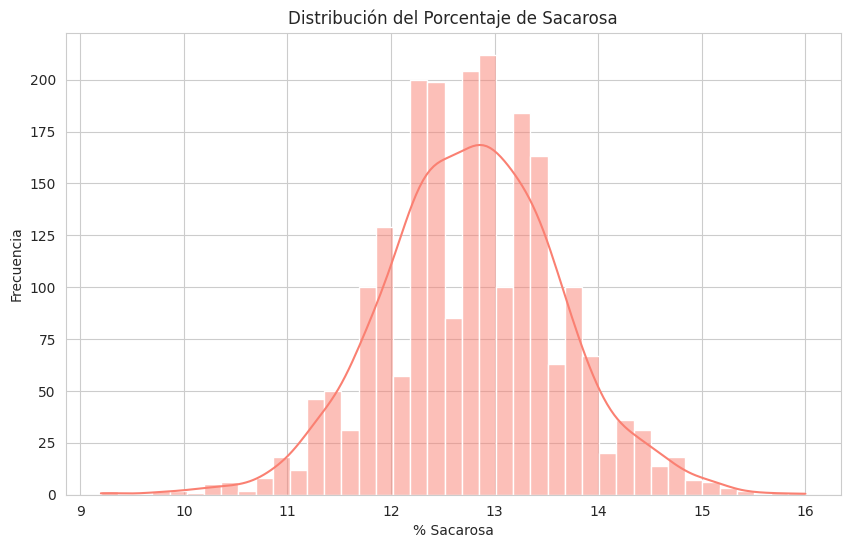

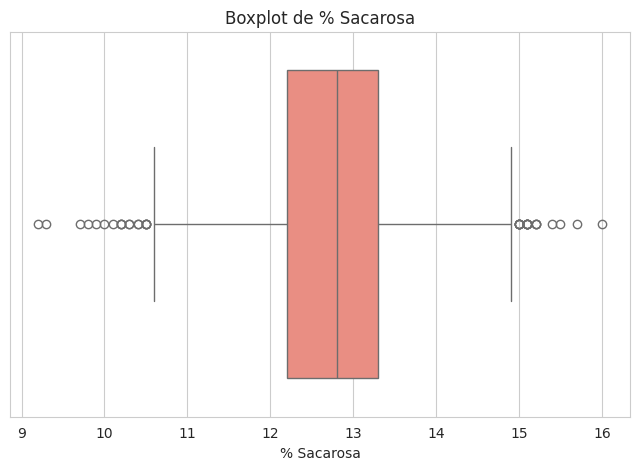

In [22]:
# --- 1.1 Análisis de Variables Numéricas Clave: TCH y sacarosa ---


# Creamos una figura con dos subplots (uno al lado del otro)
fig, ax = plt.subplots(figsize=(10, 6)) # Ajusta el tamaño si es necesario


# Histograma para TCH
sns.histplot(df_trabajo['TCH'], kde=True, ax=ax, color='skyblue')
ax.set_title('Distribución de TCH (Toneladas de Caña/Hectárea)')
ax.set_xlabel('TCH')
ax.set_ylabel('Frecuencia')
plt.show()



# Boxplot para TCH
# (Lo pondremos en otro gráfico para mayor claridad)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_trabajo['TCH'], color='skyblue')
plt.title('Boxplot de TCH')
plt.xlabel('TCH')
plt.show()




El análisis de la variable TCH (Toneladas de Caña por Hectárea) a través del histograma y el boxplot nos ofrece una visión clara de su comportamiento y distribución.


Distribución Normal y Simétrica: El histograma muestra que la distribución del TCH se asemeja mucho a una distribución normal, con una forma de campana casi simétrica. Esto indica que la mayoría de los registros de producción se agrupan en torno a un valor central, con frecuencias que disminuyen gradualmente hacia los extremos.


Concentración de Datos: El boxplot confirma esta observación, mostrando que el 50% central de los datos (el rango intercuartílico) es relativamente compacto, con una mediana cercana a 145 TCH. La mayor parte de la producción se encuentra concentrada entre aproximadamente 130 y 155 toneladas por hectárea.


Presencia de Valores Atípicos (Outliers): El boxplot revela claramente la existencia de numerosos valores atípicos en ambos extremos de la distribución. Se observan registros con rendimientos inusualmente bajos (por debajo de 80 TCH) y otros con rendimientos excepcionalmente altos (superiores a 200 TCH). Estos puntos representan casos de producción que se desvían significativamente de la norma y podrían ser objeto de un análisis más detallado.


Implicaciones para la Categorización: La naturaleza unimodal (un solo pico) y la simetría de la distribución  validan que el uso de percentiles (terciles) es una estrategia adecuada para segmentar esta variable en las categorías "Bajo", "Medio" y "Alto". Este método asegurará que cada categoría represente una porción significativa y comparable de la distribución principal de los datos.

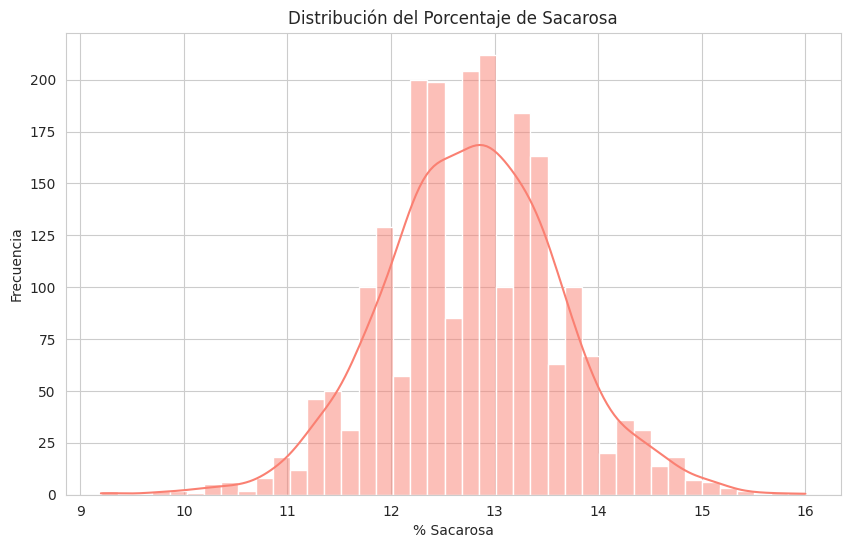

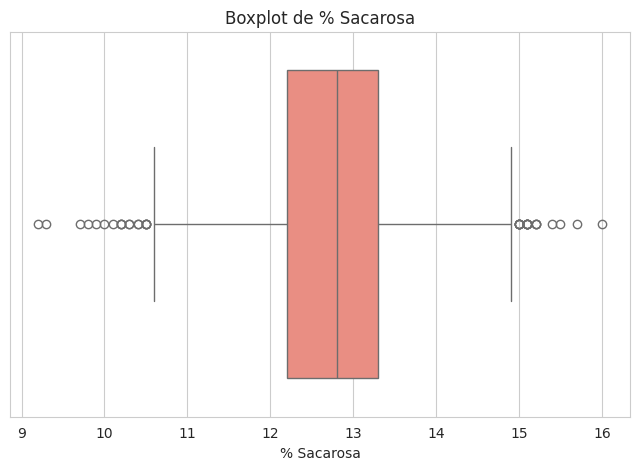

In [23]:
# Histograma para sacarosa
fig, ax = plt.subplots(figsize=(10, 6))

# Graficamos directamente en el único subplot 'ax'
sns.histplot(df_trabajo['sacarosa'], kde=True, ax=ax, color='salmon')
ax.set_title('Distribución del Porcentaje de Sacarosa')
ax.set_xlabel('% Sacarosa')
ax.set_ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()


# Boxplot para sacarosa
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_trabajo['sacarosa'], color='salmon')
plt.title('Boxplot de % Sacarosa')
plt.xlabel('% Sacarosa')
plt.show()

El análisis de la variable % Sacarosa revela un comportamiento muy similar al observado en TCH, mostrando una distribución estadística bien definida.

Distribución Normal y Concentración Central: El histograma presenta una clara forma de campana, característica de una distribución normal. La gran mayoría de los registros se concentran en un rango de porcentaje de sacarosa entre 12% y 13.5%, con un pico de frecuencia alrededor del 12.8%.

Simetría y Mediana: El boxplot refuerza esta idea de simetría, con una mediana (la línea central de la caja) ubicada aproximadamente en 12.8%, coincidiendo con el pico del histograma. El 50% central de los datos se encuentra en un rango estrecho, entre 12.2% y 13.2% aproximadamente.

Presencia de Outliers: Al igual que con TCH, el boxplot identifica la presencia de valores atípicos en ambos extremos. Existen registros con porcentajes de sacarosa considerablemente bajos (inferiores al 11%) y otros con valores muy altos (superiores al 14.5%). Estos casos representan rendimientos de calidad que se escapan de la norma.

Justificación para la Categorización: La distribución normal y la concentración de los datos alrededor de la media hacen que la segmentación mediante percentiles (terciles) sea una metodología muy apropiada. Este enfoque garantizará que las categorías "Bajo", "Medio" y "Alto" se definan de manera equitativa y representen fielmente los diferentes niveles de calidad de sacarosa presentes en el conjunto de datos.

##Analisis bivariado

--- 1. Análisis con Gráficos de Dispersión ---


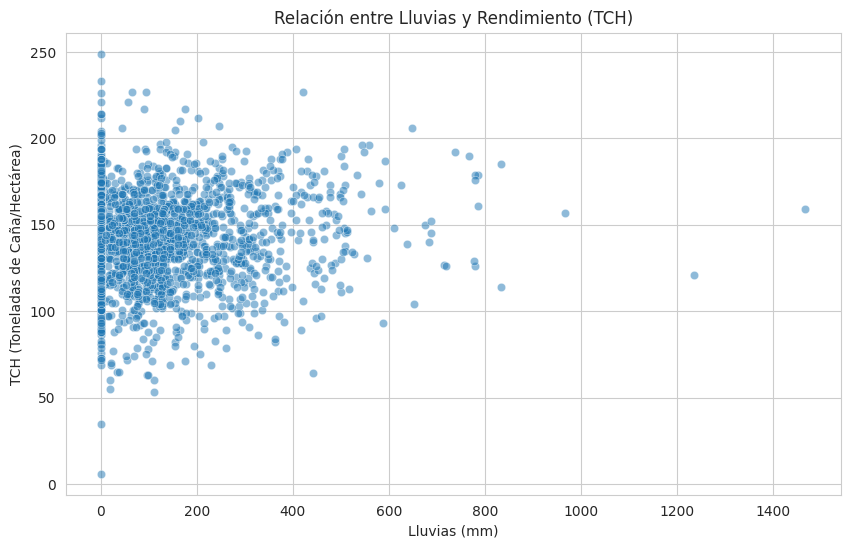

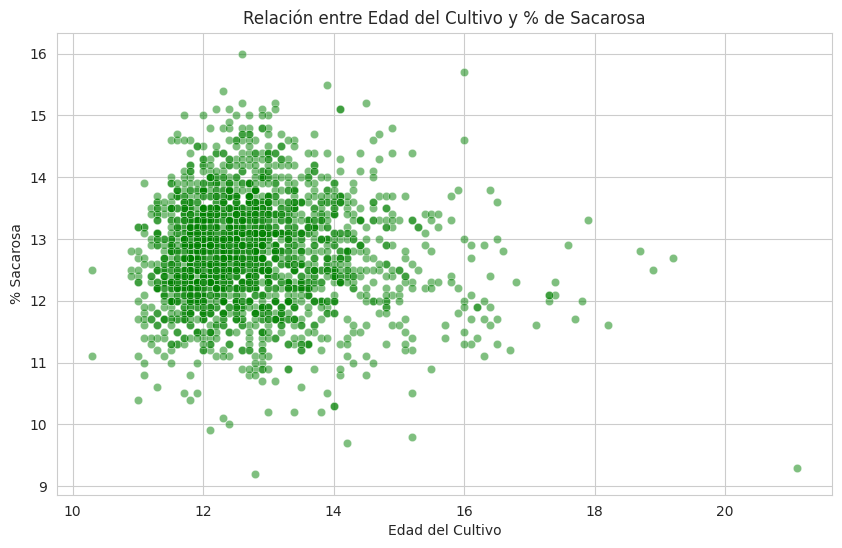

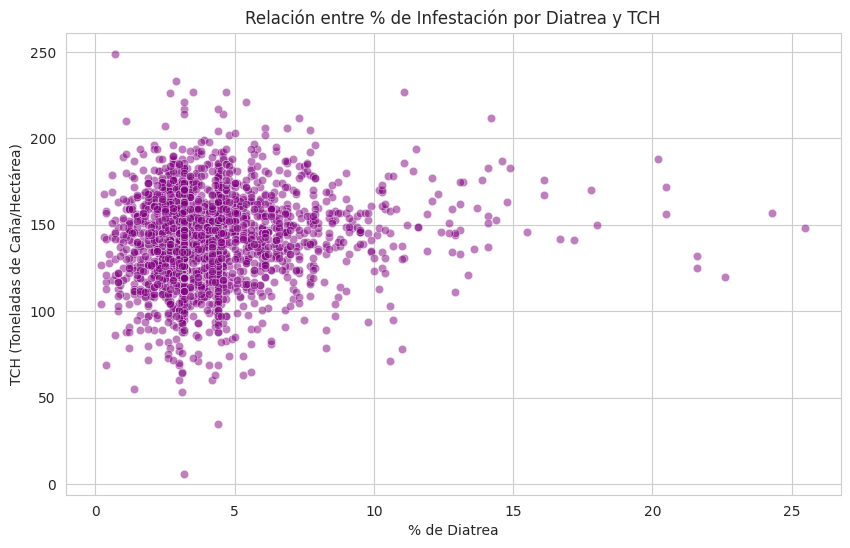

In [27]:

# ==============================================================================
# SECCIÓN 1: GRÁFICOS DE DISPERSIÓN (SCATTER PLOTS)
# Objetivo: Visualizar la relación entre una variable predictora numérica y
# nuestras variables objetivo continuas.
# ==============================================================================

print("--- 1. Análisis con Gráficos de Dispersión ---")

# --- Gráfico 1: TCH vs. Lluvias ---
# Buscamos si existe un patrón entre la cantidad de lluvia y el rendimiento.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lluvias', y='TCH', data=df_trabajo, alpha=0.5)
plt.title('Relación entre Lluvias y Rendimiento (TCH)')
plt.xlabel('Lluvias (mm)')
plt.ylabel('TCH (Toneladas de Caña/Hectárea)')
plt.show()

# --- Gráfico 2: Sacarosa vs. Edad del Cultivo ---
# Queremos ver si la edad del cultivo influye en la calidad (porcentaje de sacarosa).
plt.figure(figsize=(10, 6))
sns.scatterplot(x='edad', y='sacarosa', data=df_trabajo, alpha=0.5, color='green')
plt.title('Relación entre Edad del Cultivo y % de Sacarosa')
plt.xlabel('Edad del Cultivo')
plt.ylabel('% Sacarosa')
plt.show()

# --- Gráfico 3: TCH vs. Porcentaje de Diatrea ---
# Analizamos si la infestación de la plaga tiene un impacto visible en el rendimiento.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pct_diatrea', y='TCH', data=df_trabajo, alpha=0.5, color='purple')
plt.title('Relación entre % de Infestación por Diatrea y TCH')
plt.xlabel('% de Diatrea')
plt.ylabel('TCH (Toneladas de Caña/Hectárea)')
plt.show()


Basado en la visualización de las relaciones entre las variables, se pueden extraer las siguientes conclusiones iniciales:

Relación entre Lluvias y Rendimiento (TCH):

No se observa una correlación lineal clara o fuerte entre la cantidad de lluvias y el rendimiento en TCH. Los datos se presentan como una nube de puntos densa y dispersa, especialmente para niveles de lluvia por debajo de 400 mm. Esto sugiere que, aunque las lluvias son un factor importante, su impacto no es directamente proporcional y el rendimiento probablemente depende de una combinación más compleja de factores.

Relación entre Edad del Cultivo y % de Sacarosa:

Existe una concentración notable de datos donde los mayores porcentajes de sacarosa (entre 12% y 14%) se alcanzan cuando la edad del cultivo se encuentra aproximadamente entre 11.5 y 14 meses. Fuera de este rango, tanto para cultivos más jóvenes como más viejos, la concentración de sacarosa tiende a ser menor y más dispersa. Esto indica que existe un punto óptimo de madurez para maximizar la calidad del azúcar.

Relación entre % de Infestación por Diatrea y TCH:

No se aprecia una tendencia negativa evidente que indique que a mayor infestación por Diatrea, menor es el rendimiento en TCH. La mayoría de los datos se concentran en niveles bajos de infestación (menos del 10%), donde el TCH varía ampliamente. Aunque hay algunos puntos con alta infestación y bajo rendimiento, no es un patrón dominante. Esto podría significar que, en los niveles observados, la plaga no es el factor principal que limita el rendimiento o su efecto está controlado.


--- 2. Análisis con Matriz de Correlación ---


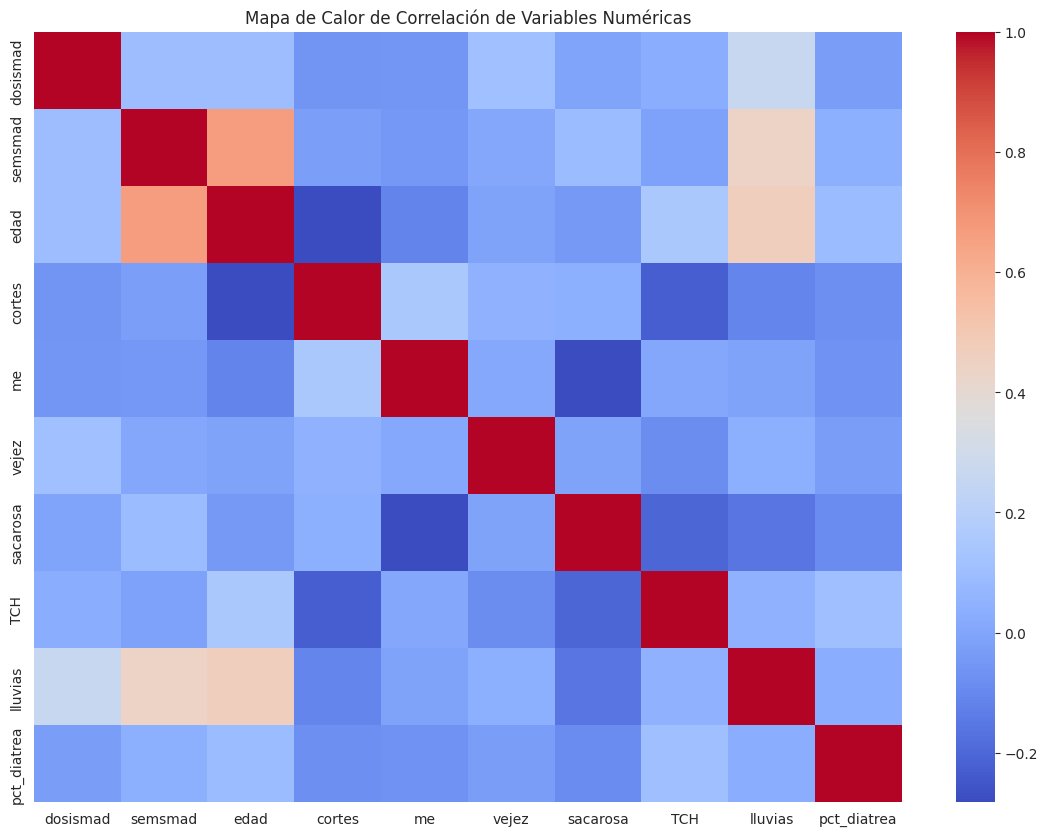


Correlaciones más fuertes con TCH:
TCH            1.000000
edad           0.150832
pct_diatrea    0.105009
lluvias        0.050599
dosismad       0.028478
me             0.007890
semsmad       -0.012170
vejez         -0.082230
sacarosa      -0.207086
cortes        -0.230539
Name: TCH, dtype: float64

Correlaciones más fuertes con sacarosa:
sacarosa       1.000000
semsmad        0.092324
cortes         0.040351
dosismad      -0.006872
vejez         -0.011720
edad          -0.043997
pct_diatrea   -0.090487
lluvias       -0.158616
TCH           -0.207086
me            -0.278591
Name: sacarosa, dtype: float64


In [29]:
# ==============================================================================
# SECCIÓN 2: MATRIZ DE CORRELACIÓN
# Objetivo: Obtener una vista cuantitativa y rápida de la relación lineal
# entre TODAS las variables numéricas del dataset.
# ==============================================================================

print("\n--- 2. Análisis con Matriz de Correlación ---")

# Primero, seleccionamos solo las columnas que son de tipo numérico (int o float)
numeric_cols = df_trabajo.select_dtypes(include=['int64', 'float64'])

# Calculamos la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Creamos un mapa de calor (heatmap) para visualizar la matriz
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación de Variables Numéricas')
plt.show()

##Mostrar las correlaciones más altas con TCH y sacarosa
print("\nCorrelaciones más fuertes con TCH:")
print(correlation_matrix['TCH'].sort_values(ascending=False).head(10))

print("\nCorrelaciones más fuertes con sacarosa:")
print(correlation_matrix['sacarosa'].sort_values(ascending=False).head(10))

El análisis de la matriz de correlación y los valores asociados a las variables objetivo, TCH y sacarosa, revela las siguientes observaciones clave:


Ausencia de Correlaciones Lineales Fuertes: La principal conclusión es que ninguna variable numérica tiene una correlación lineal fuerte (cercana a 1 o -1) con TCH o sacarosa. Todos los coeficientes de correlación son inferiores a |0.3|, lo que indica que las relaciones son débiles. Esto sugiere que el rendimiento y la calidad no pueden ser explicados de manera simple por una única variable, sino que probablemente dependen de una combinación de factores o de relaciones no lineales.

Correlaciones más Relevantes con TCH:

La correlación más significativa es una

negativa débil con cortes (-0.23) y sacarosa (-0.21). Esto podría insinuar una ligera tendencia a que los cultivos con más cortes o mayor concentración de azúcar tengan un rendimiento en toneladas ligeramente menor.

La correlación positiva más alta es con

edad (0.15), la cual es muy débil.

Correlaciones más Relevantes con Sacarosa:

La correlación más fuerte es

negativa y débil con la variable me (-0.28). Esto sugiere que a medida que el valor de

me aumenta, el porcentaje de sacarosa tiende a disminuir ligeramente.

También se observa la misma correlación negativa débil con

TCH (-0.21) y una relación negativa con lluvias (-0.16).

In [24]:
# Justificación: Usamos percentiles (terciles) para dividir los datos en tres grupos
# de tamaño similar (Bajo, Medio, Alto), asegurando que las clases estén balanceadas.

# Para TCH
# Calcular los umbrales usando los percentiles 33.3 y 66.6
tch_terciles = df_trabajo['TCH'].quantile([0.333, 0.666]).tolist()
print(f"\nUmbrales para TCH (percentiles 33.3 y 66.6): {tch_terciles}")

# Crear la columna 'Nivel_TCH' usando los umbrales
.
df_trabajo['Nivel_TCH'] = pd.cut(df_trabajo['TCH'],
                         bins=[df_trabajo['TCH'].min(), tch_terciles[0], tch_terciles[1], df_trabajo['TCH'].max()],
                         labels=['Bajo', 'Medio', 'Alto'],
                         include_lowest=True) # include_lowest=True para incluir el valor mínimo

# Para Sacarosa
# Calcular los umbrales para 'sacarosa'
sacarosa_terciles = df_trabajo['sacarosa'].quantile([0.333, 0.666]).tolist()
print(f"Umbrales para Sacarosa (percentiles 33.3 y 66.6): {sacarosa_terciles}")

# Crear la columna 'Nivel_Sacarosa'
df_trabajo['Nivel_Sacarosa'] = pd.cut(df_trabajo['sacarosa'],
                              bins=[df_trabajo['sacarosa'].min(), sacarosa_terciles[0], sacarosa_terciles[1], df_trabajo['sacarosa'].max()],
                              labels=['Bajo', 'Medio', 'Alto'],
                              include_lowest=True)

print("\nDistribución de las nuevas categorías:")
print("Nivel_TCH:\n", df_trabajo['Nivel_TCH'].value_counts())
print("\nNivel_Sacarosa:\n", df_trabajo['Nivel_Sacarosa'].value_counts())


Umbrales para TCH (percentiles 33.3 y 66.6): [133.0, 153.0]
Umbrales para Sacarosa (percentiles 33.3 y 66.6): [12.4, 13.1]

Distribución de las nuevas categorías:
Nivel_TCH:
 Nivel_TCH
Bajo     754
Alto     728
Medio    705
Name: count, dtype: int64

Nivel_Sacarosa:
 Nivel_Sacarosa
Bajo     761
Alto     716
Medio    710
Name: count, dtype: int64
